<a href="https://colab.research.google.com/github/JaimeOcean/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Sprint_2_DS_Unit_1_Sprint_Challenge_2_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of Echocardiograms

<https://archive.ics.uci.edu/ml/datasets/Echocardiogram>

Attribute Information:

1. survival -- the number of months patient survived (has survived, if patient is still alive). Because all the patients had their heart attacks at different times, it is possible that some patients have survived less than one year but they are still alive. Check the second variable to confirm this. Such patients cannot be used for the prediction task mentioned above.
2. still-alive -- a binary variable. 0=dead at end of survival period, 1 means still alive
3. age-at-heart-attack -- age in years when heart attack occurred
4. pericardial-effusion -- binary. Pericardial effusion is fluid around the heart. 0=no fluid, 1=fluid
5. fractional-shortening -- a measure of contracility around the heart lower numbers are increasingly abnormal
6. epss -- E-point septal separation, another measure of contractility. Larger numbers are increasingly abnormal.
7. lvdd -- left ventricular end-diastolic dimension. This is a measure of the size of the heart at end-diastole. Large hearts tend to be sick hearts.
8. wall-motion-score -- a measure of how the segments of the left ventricle are moving
9. wall-motion-index -- equals wall-motion-score divided by number of segments seen. Usually 12-13 segments are seen in an echocardiogram. Use this variable INSTEAD of the wall motion score.
10. mult -- a derivate var which can be ignored
11. name -- the name of the patient (I have replaced them with "name")
12. group -- meaningless, ignore it
13. alive-at-1 -- Boolean-valued. Derived from the first two attributes. 0 means patient was either dead after 1 year or had been followed for less than 1 year. 1 means patient was alive at 1 year.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [13]:
!pip install --upgrade seaborn
import seaborn as sns

sns.__version__

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.10.1)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


'0.10.1'

In [15]:
dataurl = "https://archive.ics.uci.edu/ml/machine-learning-databases/echocardiogram/echocardiogram.data"

In [28]:
columnnames = ['A'+str(i) for i in range (1, 13)]

df = pd.read_csv(dataurl, header=None, names=columnnames, na_values= '?')

df.isnull().sum()
df.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A12
count,131.000000,126.000000,132.000000,124.000000,117.000000,121.000000,128.000000,130.00000,129.000000,75.000000
mean,0.328244,62.813722,0.765152,0.216734,12.164769,4.763157,14.438125,1.37800,0.786202,0.346667
std,0.471377,8.342110,6.697225,0.107513,7.370159,0.810013,5.018566,0.45185,0.225661,0.506534
min,0.000000,35.000000,0.000000,0.010000,0.000000,2.320000,2.000000,1.00000,0.140000,0.000000
25%,0.000000,57.000000,0.000000,0.150000,7.000000,4.230000,11.000000,1.00000,0.714000,0.000000
50%,0.000000,62.000000,0.000000,0.205000,11.000000,4.650000,14.000000,1.21600,0.786000,0.000000
75%,1.000000,67.750000,0.000000,0.270000,16.100000,5.300000,16.500000,1.50750,0.857000,1.000000
max,1.000000,86.000000,77.000000,0.610000,40.000000,6.780000,39.000000,3.00000,2.000000,2.000000


In [32]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12
11.0,0.0,71.0,0,0.260,9.000,4.600,14.0,1.00,1.000,name,1,0.0
19.0,0.0,72.0,0,0.380,6.000,4.100,14.0,1.70,0.588,name,1,0.0
16.0,0.0,55.0,0,0.260,4.000,3.420,14.0,1.00,1.000,name,1,0.0
57.0,0.0,60.0,0,0.253,12.062,4.603,16.0,1.45,0.788,name,1,0.0
19.0,1.0,57.0,0,0.160,22.000,5.750,18.0,2.25,0.571,name,1,0.0


In [29]:
df.shape

(132, 12)

In [31]:
values = {'A2': df.A2.mean(), 'A12': df.A12.mean()}
df.fillna(value=values, inplace=True)

df.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A12
count,131.000000,132.000000,132.000000,124.000000,117.000000,121.000000,128.000000,130.00000,129.000000,132.000000
mean,0.328244,62.813722,0.765152,0.216734,12.164769,4.763157,14.438125,1.37800,0.786202,0.346667
std,0.471377,8.148830,6.697225,0.107513,7.370159,0.810013,5.018566,0.45185,0.225661,0.380705
min,0.000000,35.000000,0.000000,0.010000,0.000000,2.320000,2.000000,1.00000,0.140000,0.000000
25%,0.000000,57.750000,0.000000,0.150000,7.000000,4.230000,11.000000,1.00000,0.714000,0.000000
50%,0.000000,62.264500,0.000000,0.205000,11.000000,4.650000,14.000000,1.21600,0.786000,0.346667
75%,1.000000,67.000000,0.000000,0.270000,16.100000,5.300000,16.500000,1.50750,0.857000,0.346667
max,1.000000,86.000000,77.000000,0.610000,40.000000,6.780000,39.000000,3.00000,2.000000,2.000000


In [18]:
df.describe(exclude=[np.number])

,A11,A12
count,131,110
unique,1,3
top,name,2
freq,131,85


In [19]:
df.fillna(method='ffill', inplace=True)

df.describe(exclude=[np.number])

,A11,A12
count,132,132
unique,1,3
top,name,2
freq,132,107


In [36]:
df.isnull().sum()

A1      1
A2      0
A3      0
A4      8
A5     15
A6     11
A7      4
A8      2
A9      3
A10     1
A11    22
A12     0
dtype: int64

In [37]:
df.dtypes

A1     float64
A2     float64
A3       int64
A4     float64
A5     float64
A6     float64
A7     float64
A8     float64
A9     float64
A10     object
A11     object
A12    float64
dtype: object

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that Alive-at-1 is the class label. Besides that, we have continuous features and categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`1` and `0`).

For the continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are also categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [50]:
dfgrouped = df.groupby('A12')

# Column names with continous data
continousdatacols = ['A1', 'A3', 'A4', 'A9', 'A12']

for i in continousdatacols:
  print("\nColumn {}\n".format(i))
  print(dfgrouped[i].describe())


Column A1

          count      mean       std  min  25%  50%  75%  max
A12                                                         
0.000000   50.0  0.100000  0.303046  0.0  0.0  0.0  0.0  1.0
0.346667   57.0  0.245614  0.434277  0.0  0.0  0.0  0.0  1.0
1.000000   24.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
2.000000    0.0       NaN       NaN  NaN  NaN  NaN  NaN  NaN

Column A3

          count       mean       std   min   25%   50%   75%   max
A12                                                               
0.000000   50.0   0.140000  0.350510   0.0   0.0   0.0   0.0   1.0
0.346667   57.0   0.157895  0.367884   0.0   0.0   0.0   0.0   1.0
1.000000   24.0   0.333333  0.481543   0.0   0.0   0.0   1.0   1.0
2.000000    1.0  77.000000       NaN  77.0  77.0  77.0  77.0  77.0

Column A4

          count      mean       std    min     25%    50%     75%   max
A12                                                                    
0.000000   48.0  0.241021  0.115962  0.030  0.1575  

In [51]:
dfA10pos = df[df.A10 == '+']
dfA10pneg = df[df.A10 == '-']

In [52]:
from scipy import stats

s1 = "Features that significantly affects positive class attribute\n"
s2 = "Features that significantly affects negative class attribute\n"
s3 = "Features that have no significant affect on class attribute\n"


for column in continousdatacols:
  statistics, pvalue = stats.ttest_ind(dfA10pos[column], 
                          dfA10pneg[column], 
                          equal_var=True)
  if statistics > 0 and pvalue < 1:
    s1 += "{:1} {:<1.5} {:.01}\n".format(column, statistics, pvalue)
  elif statistics < 0 and pvalue < 1:
    s2 += "{:1} {:<1.5} {:.01}\n".format(column, statistics, pvalue)
  else:
    s3 += "{:1} {:<1.5} {:.01}\n".format(column, statistics, pvalue)

print("{}\n{}\n{}".format(s1, s2, s3))

Features that significantly affects positive class attribute

Features that significantly affects negative class attribute

Features that have no significant affect on class attribute
A1 nan nan
A3 nan nan
A4 nan nan
A9 nan nan
A12 nan nan



In [53]:
categoricaldatacols = [i for i in df.columns if i not in continousdatacols]
categoricaldatacols.remove('A10')

s1 = "Features that significantly affects class attribute\n"
s2 = "Features that have no significant affect on class attribute\n"

for column in categoricaldatacols:
  statistics, pvalue = stats.chisquare(pd.crosstab(df[column], df.A10), 
                                      axis=None)
  if pvalue < 1:
    s1 += "{:1} {:<1.5} {:.01}\n".format(column, statistics, pvalue)
  else:
    s2 += "{:1} {:<1.5} {:.01}\n".format(column, statistics, pvalue)
    
print("{}\n{}".format(s1, s2))

Features that significantly affects class attribute
A2 71.74 0.0008
A5 53.308 1e+00
A7 215.83 2e-24
A8 750.46 5e-121
A11 34.138 5e-09

Features that have no significant affect on class attribute
A6 19.612 1e+00



In [69]:
from scipy import stats
from scipy.stats import ttest_ind
import numpy as np
import matplotlib.pyplot as plt

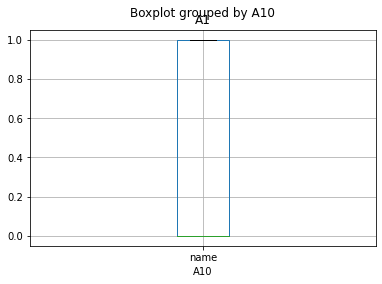

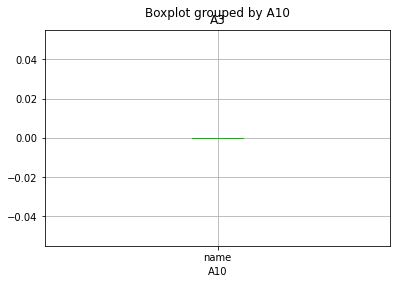

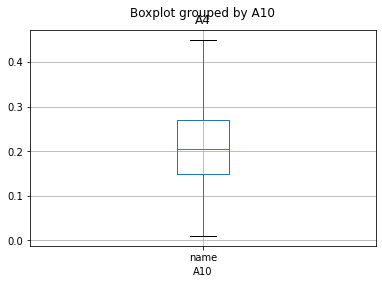

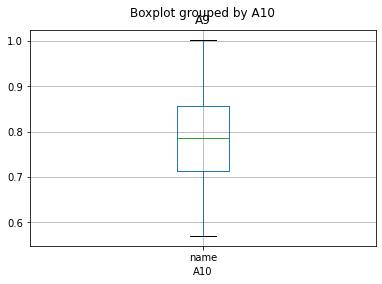

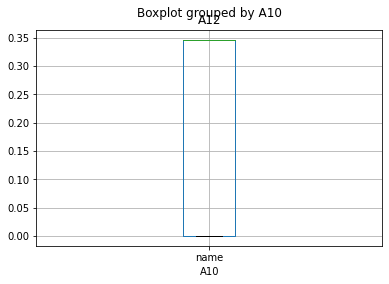

In [70]:
cols = ["A1", "A3", "A4", "A9", "A12"]

boxplots = [df.boxplot(column=col, by="A10", showfliers=False) for col in cols]

In [72]:
ttest_ind(pos_df.A12, neg_df.A12)

Ttest_indResult(statistic=10.226991799123855, pvalue=2.420247675448483e-18)

In [79]:
ttest_ind(pos_df.A12, neg_df.A12, nan_policy='omit')

Ttest_indResult(statistic=10.226991799123855, pvalue=2.420247675448483e-18)

In [73]:
ttest_ind(pos_df.A1, neg_df.A1)

Ttest_indResult(statistic=inf, pvalue=0.0)

In [74]:
ttest_ind(pos_df.A1, neg_df.A1, nan_policy='omit')

Ttest_indResult(statistic=inf, pvalue=0.0)

In [75]:
ttest_ind(pos_df.A3, neg_df.A3)

Ttest_indResult(statistic=1.9977058069843026, pvalue=0.04785200949077697)

In [76]:
ttest_ind(pos_df.A3, neg_df.A3, nan_policy='omit')

Ttest_indResult(statistic=1.9977058069843026, pvalue=0.04785200949077697)

In [77]:
ttest_ind(pos_df.A4, neg_df.A4)

Ttest_indResult(statistic=nan, pvalue=nan)

In [78]:
ttest_ind(pos_df.A4, neg_df.A4, nan_policy='omit')

Ttest_indResult(statistic=-3.3976225505527884, pvalue=0.0009184742447359485)

In [80]:
ttest_ind(pos_df.A9, neg_df.A9)

Ttest_indResult(statistic=nan, pvalue=nan)

In [81]:
ttest_ind(pos_df.A9, neg_df.A9, nan_policy='omit')

Ttest_indResult(statistic=-1.5836202031451647, pvalue=0.11578696901410755)

In [83]:
from scipy.stats import chisquare 

categorical_feats = [df.A1, df.A3, df.A4, df.A7, df.A9, df.A12]

crosstabs = [pd.crosstab(df.A12, feat) for feat in categorical_feats]

for crosstab in crosstabs:
  print(crosstab)
  print(chisquare(crosstab,axis=None))
  print("\n\n")

A1        0.0  1.0
A12               
0.000000   45    5
0.346667   43   14
1.000000    0   24
Power_divergenceResult(statistic=82.93893129770991, pvalue=2.0352065886905847e-16)



A3        0   1   77
A12                 
0.000000  43   7   0
0.346667  48   9   0
1.000000  16   8   0
2.000000   0   0   1
Power_divergenceResult(statistic=286.54545454545456, pvalue=5.9577689733177965e-55)



A4        0.010  0.030  0.036  0.040  0.050  ...  0.440  0.450  0.500  0.510  0.610
A12                                          ...                                   
0.000000      0      1      0      0      0  ...      0      1      0      1      1
0.346667      0      0      1      0      1  ...      1      0      1      0      0
1.000000      1      0      0      1      1  ...      0      0      0      0      0

[3 rows x 51 columns]
Power_divergenceResult(statistic=174.5967741935484, pvalue=0.10121867276257225)



A7        2.00   5.00   5.50   6.00   7.50   ...  24.00  26.08  27.00  28.00  39

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

*Your words here!*

In [86]:
#Based on the t-test output.
#A8 feature seems to have highest significance for approval.
#A5 feature seems to have high significance for rejection.

#Features that have no significant affect on class attribute
#A1 nan nan
#A3 nan nan
#A4 nan nan
#A9 nan nan
#A12 nan nan
#Features that significantly affects class attribute
#A2 71.74 0.0008
#A5 53.308 1e+00
#A7 215.83 2e-24
#A8 750.46 5e-121
#A11 34.138 5e-09

#Features that have no significant affect on class attribute
#A6 19.612 1e+00

In [87]:
#Based on the chisquare-test output.
#A1, A3, A7 & A9 feature seems to have higher significance on class attribute as compared to other columns.
#A4 feature seems to have least significance on class attribute as compared to other columns.

## Part 4 - Bayesian vs Frequentist Statistics

Using a minimum of 2-3 sentences, give an explanation of Bayesian and Frequentist statistics, and then compare and contrast these two approaches to statistical inference.



In [90]:
from scipy import stats
import numpy as np
np.random.seed(seed=42)

In [91]:
alive = np.random.binomial(n=1, p=.5, size=132)
alive

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

In [98]:
np.mean(alive)

0.4772727272727273

In [99]:
df['A4'].mean()

0.21673387096774194

In [114]:
#CI_freq = stats.t.interval(0.95,
 #                          len(df),
  #                         loc = df['A4'].mean()
   #                        scale = stats.sem(df['A4']
   #                        )
#CI_freq

In [110]:
CI_bayes = stats.bayes_mvs(alive, alpha=.95)[0][1]
CI_bayes

(0.3909422981999091, 0.5636031563455455)

*Your words here!*

A4 has less chances of surviving than a random sample.


# Stretch Goals: 
Do these to get a 3. These are not required in order to pass the Sprint Challenge.

## Part 1: 

Make sure that all of your dataframe columns have the appropriate data types. *Hint:* If a column has the datatype of "object" even though it's made up of float or integer values, you can coerce it to act as a numeric column by using the `pd.to_numeric()` function. In order to get a 3 on this section make sure that your data exploration is particularly well commented, easy to follow, and thorough.

## Part 2:

Write functions that can calculate t-tests and chi^2 tests on all of the appropriate column combinations from the dataset. (Remember that certain tests require certain variable types.)

## Part 3: 

Calculate and report confidence intervals on your most important mean estimates (choose at least two). Make some kind of a graphic or visualization to help us see visually how precise these estimates are.

## Part 4:

Give an extra awesome explanation of Bayesian vs Frequentist Statistics. Maybe use code or visualizations, or any other means necessary to show an above average grasp of these high level concepts.

In [ ]:
# You can work the stretch goals down here or back up in their regular sections
# just make sure that they are labeled so that we can easily differentiate
# your main work from the stretch goals.